<a href="https://colab.research.google.com/github/phutaekwondo/CS114.L21/blob/main/BT_colab_so_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

># **Bài tập Colab số 2**

---


#**Dự đoán thoài gian chạy của chương trình dựa vào kích thước đầu vào.**

##**Nhóm thực hiện**
1. Lại Nguyễn Vĩnh Phú - 19522020
2. Nguyễn Chí Cường - 19521299
3. Trương Thế Trường - 19522447

##***Dữ liệu***
*Dự đoán thời gian chạy của chương trình dựa vào kích thước.*
1. [Data train](http://cs.uit.edu.vn/data2.txt?fbclid=IwAR11i7MdMWgqg6i1ab0z3C1VRJLM_6BpnjlpS_hZmNhlBJeYjDihp479fnU)
2. [Data test 1](http://cs.uit.edu.vn/data3.txt?fbclid=IwAR0xQwlnCNoEWthoc8txwpYSHFuf-lo6KOAXMzum53EWy89fJChAaUqGzB8)
3. [Data test 2](http://cs.uit.edu.vn/data4.txt?fbclid=IwAR0fXuM2Q29pRBldP-sv9znzwYQCRCGe-VHLSvGeUcrvhkFR2UhxtCddIZQ)

##***Tài liệu tham khảo***
1. [Realpython](https://realpython.com/linear-regression-in-python/)
2. [Kaggle](https://www.kaggle.com/dssant85/linear-regression-with-logarithmic-transformation)
3. [Polynomail](https://towardsdatascience.com/polynomial-regression-bbe8b9d97491)

# ***Xử lý dữ liệu***

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
url_train = 'http://cs.uit.edu.vn/data2.txt?fbclid=IwAR11i7MdMWgqg6i1ab0z3C1VRJLM_6BpnjlpS_hZmNhlBJeYjDihp479fnU'
url_test_1 = 'http://cs.uit.edu.vn/data3.txt?fbclid=IwAR0xQwlnCNoEWthoc8txwpYSHFuf-lo6KOAXMzum53EWy89fJChAaUqGzB8'
url_test_2 = 'http://cs.uit.edu.vn/data4.txt?fbclid=IwAR0fXuM2Q29pRBldP-sv9znzwYQCRCGe-VHLSvGeUcrvhkFR2UhxtCddIZQ'

In [ ]:
data_train = pd.read_csv(url_train, header=None, names = ['x', 'y'])
data_test_1 = pd.read_csv(url_test_1, header=None, names = ['x', 'y'])
data_test_2 = pd.read_csv(url_test_2, header=None, names = ['x', 'y'])
X_train, y_train = np.array(data_train['x']).reshape(-1,1), np.array(data_train['y'])
X_test_1, y_test_1 = np.array(data_test_1['x']).reshape(-1,1), np.array(data_test_1['y'])
X_test_2, y_test_2 = np.array(data_test_2['x']).reshape(-1,1), np.array(data_test_2['y'])
y_data = np.concatenate((y_train, y_test_1, y_test_2))
X_data = np.concatenate((X_train, X_test_1, X_test_2))

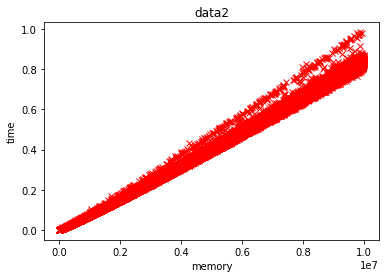

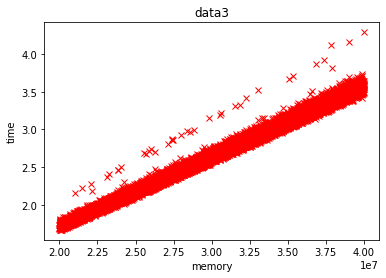

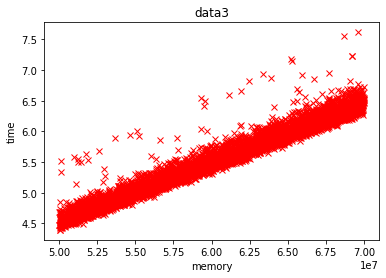

In [ ]:
import matplotlib.pyplot as plt

plt.plot(X_train, y_train, "x", color='red')
plt.title("data2")
plt.xlabel('memory')
plt.ylabel('time')
plt.show()

plt.plot(X_test_1, y_test_1, "x", color='red')
plt.title("data3")
plt.xlabel('memory')
plt.ylabel('time')
plt.show()

plt.plot(X_test_2, y_test_2, "x", color='red')
plt.title("data3")
plt.xlabel('memory')
plt.ylabel('time')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score

def show_MSE(estimated, test):
    value1 = mse(estimated, test)
    value2 = mae(estimated, test)
    print('Mean squared error:', value1)
    print('Mean absolute error:', value2)

def draw_plot(X, y, estmated, name):
  r_sq = r2_score(estmated, y)
  print(name + ':')
  print('R squre:', r_sq)
  show_MSE(estmated, y)
  plt.plot(X, y, "x", color='red')
  plt.plot(X, estmated)
  plt.title(name)
  plt.xlabel('memory')
  plt.ylabel('time')
  plt.show()

def draw_full(prediction, X=X_data, y=y_data):
  plt.plot(X, y, "x", color='red')
  plt.plot(X, prediction)
  plt.title("-----------------------Full data-----------------------")
  plt.xlabel('memory')
  plt.ylabel('time')
  plt.show()

# **Polynomial Features Transformation Function**

Công thức chung:

Polynomial Features Transformation Function

$h(x) = \theta_0 + \theta_1 * x + ... + \theta_n * x^n$

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

def polynomial(X, y, number):
  polynomial_features= PolynomialFeatures(degree=number)
  x_poly = polynomial_features.fit_transform(X)

  #Train data
  pol_LR = model.fit(x_poly, y)
  prediction_train = pol_LR.predict(x_poly)
  draw_plot(X, y, prediction_train, 'data train')

  #Test1_data
  X_test_1_poly = polynomial_features.fit_transform(X_test_1)
  prediction_test_1 = pol_LR.predict(X_test_1_poly)
  draw_plot(X_test_1, y_test_1, prediction_test_1, 'data test 1')

  #Test2_data
  X_test_2_poly = polynomial_features.fit_transform(X_test_2)
  prediction_test_2 = pol_LR.predict(X_test_2_poly)
  draw_plot(X_test_2, y_test_2, prediction_test_2, 'data test 2')

  #draw full data
  estimated_full = np.concatenate((prediction_train, prediction_test_1, prediction_test_2))
  draw_full(estimated_full)


##***Simple linear regression***

data train:
R squre: 0.9975866892874395
Mean squared error: 0.00014337728721748832
Mean absolute error: 0.008291970317762347


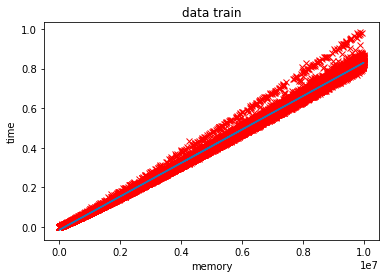

data test 1:
R squre: 0.9128585419715596
Mean squared error: 0.020664949397549138
Mean absolute error: 0.12271198006925255


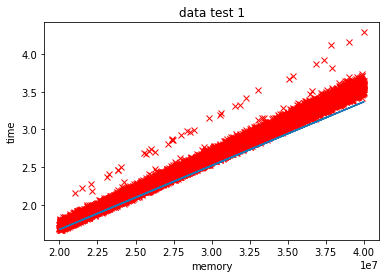

data test 2:
R squre: 0.06686808412903045
Mean squared error: 0.22348476817426108
Mean absolute error: 0.45201138673289265


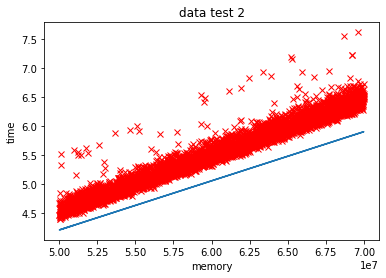

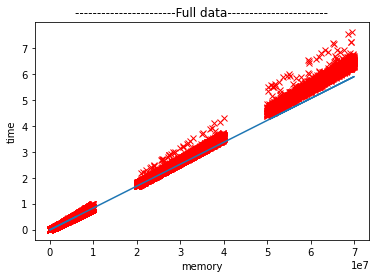

In [ ]:
#simple linear regression
polynomial(X_train, y_train, 1)

##***Quadratic function regression***

data train:
R squre: 0.9979257340000984
Mean squared error: 0.00012327598540427578
Mean absolute error: 0.007073665718015936


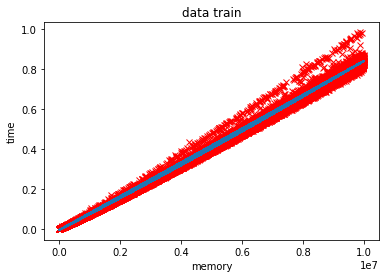

data test 1:
R squre: 0.7897335244514863
Mean squared error: 0.09177695238564393
Mean absolute error: 0.2703565635200137


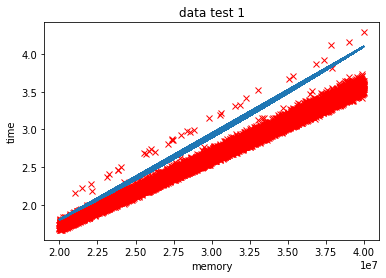

data test 2:
R squre: -1.667326264741582
Mean squared error: 2.034187428861318
Mean absolute error: 1.3859805816162731


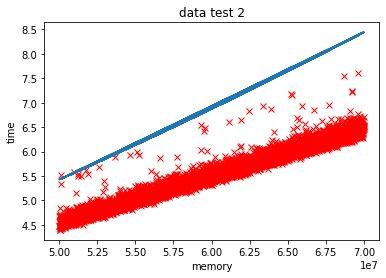

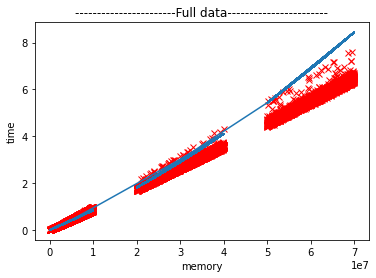

In [ ]:
#quadratic function regression
polynomial(X_train, y_train, 2)

## ***Cubic function regression***

data train:
R squre: 0.9979340183152683
Mean squared error: 0.00012253074571599515
Mean absolute error: 0.006945115315540995


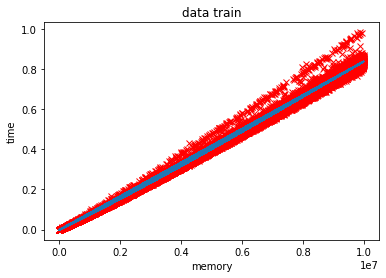

data test 1:
R squre: -30.5660938884162
Mean squared error: 0.5946229589048988
Mean absolute error: 0.6236920072440709


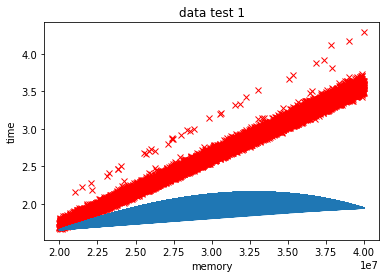

data test 2:
R squre: -16.168056896487727
Mean squared error: 61.59162118590592
Mean absolute error: 7.454926943925669


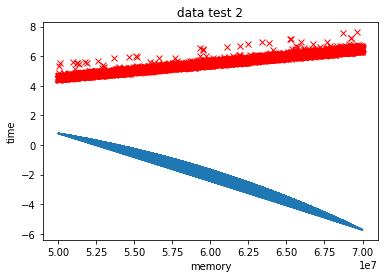

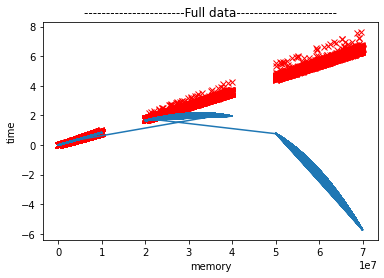

In [ ]:
#cubic function regression
polynomial(X_train, y_train, 3)

Phát hiện ra khi ta tăng bậc đa thức bậc lớn hơn 1 thì thấy MSE lớn, trong mô hình này thấy với bậc 1 (simple linear regression) là model tốt nhất.

# **Một số transformation function khác**

In [ ]:
def transformation_function(func, name):
  feature_train = func(X_train)
  _model = LinearRegression().fit(feature_train, y_train)
  _predict = _model.predict(feature_train)
  draw_plot(X_train, y_train, _predict, name + ' model train')

  feature_test1 = func(X_test_1)
  _predict_1 = _model.predict(feature_test1)
  draw_plot(X_test_1, y_test_1, _predict_1, name + ' model test 1')

  feature_test2 = func(X_test_2)
  _predict_2 = _model.predict(feature_test2)
  draw_plot(X_test_2, y_test_2, _predict_2, name + ' model test 2')

  estimated_full_ = np.concatenate((_predict, _predict_1, _predict_2))
  draw_full(estimated_full_, X_data, y_data)

##**Square root Function**
$h(x) = \theta_1 * x \sqrt{x} + \theta_0$



sqrt model train:
R squre: 0.9821859132160045
Mean squared error: 0.0010423391488549839
Mean absolute error: 0.02668749295575698


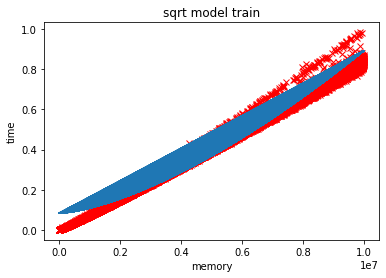

sqrt model test 1:
R squre: -1.288931339019113
Mean squared error: 3.3324795244541043
Mean absolute error: 1.695844271580312


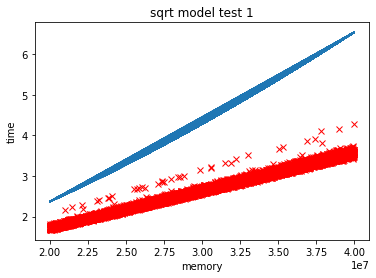

sqrt model test 2:
R squre: -13.74270057642231
Mean squared error: 43.50605250906081
Mean absolute error: 6.492156050019306


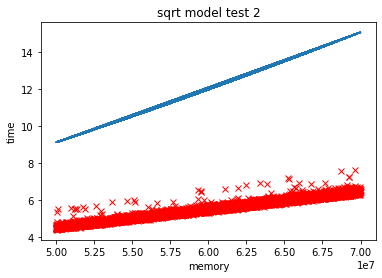

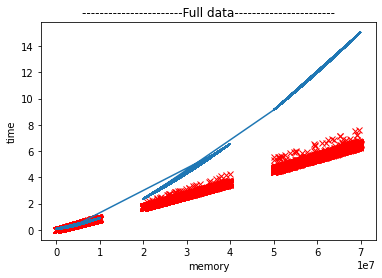

In [ ]:
def function_sqrt(X):
  return np.sqrt(X) * X
transformation_function(function_sqrt, 'sqrt')

Thấy model này không được tốt lắm. Chắc khả năng cong lên không dẫn đên overfitting

##**Logarithmic Function**
$h(x) = \theta_1 * x \log{x} + \theta_0$



log model train:
R squre: 0.997946668090441
Mean squared error: 0.00012203439798746085
Mean absolute error: 0.006899424814228178


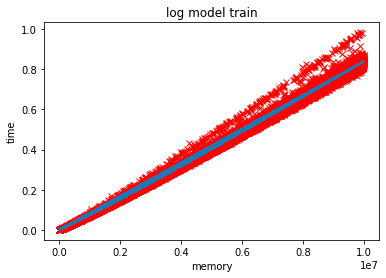

log model test 1:
R squre: 0.9819711183478046
Mean squared error: 0.005344034781896934
Mean absolute error: 0.0578374410090226


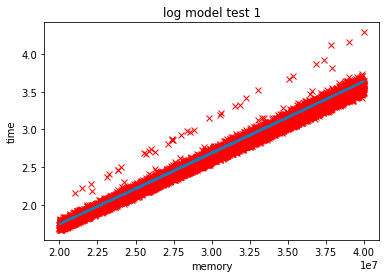

log model test 2:
R squre: 0.9385747836975529
Mean squared error: 0.019834206179683112
Mean absolute error: 0.11175157703649906


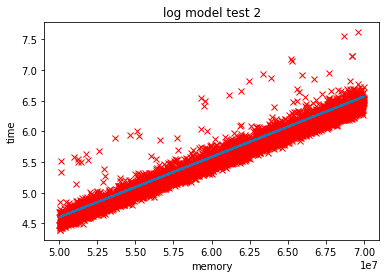

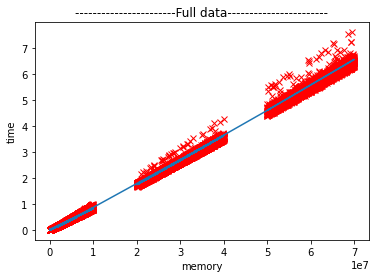

In [ ]:
def function_log(X):
  return X * np.log(X)
transformation_function(function_log, 'log')

Thấy được kết quả khá là khả quan với mô hình x*log(x)lắm, mô hình không còn bị overfitting nữa

##**Complex Function**
$h(x) = \theta_3 * x^2  + \theta_2 * x\log{x} + \theta_1 * \sqrt{x} + \theta_0$

Complex model train:
R squre: 0.9979488895903725
Mean squared error: 0.00012190263921585714
Mean absolute error: 0.006870959538600724


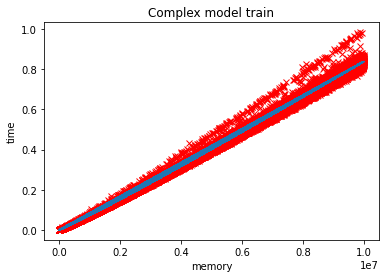

Complex model test 1:
R squre: 0.9863689464446905
Mean squared error: 0.003914717266776148
Mean absolute error: 0.04805171565826718


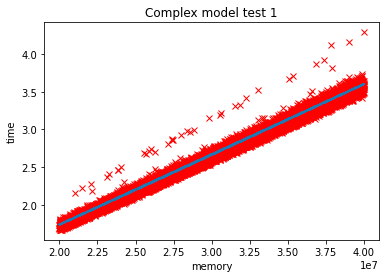

Complex model test 2:
R squre: 0.9516633386443519
Mean squared error: 0.014649044822147067
Mean absolute error: 0.08054539178489496


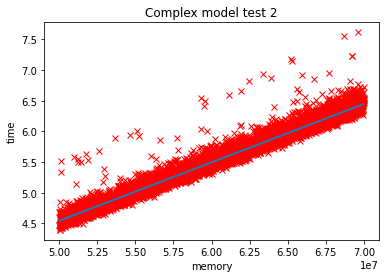

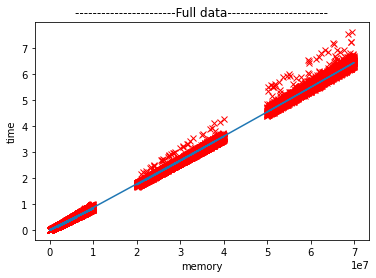

In [ ]:
def complex_function(X):
  X_logx = X * np.log(X)
  X_sqrt = np.sqrt(X)
  result = np.concatenate((X*X, X_logx, X_sqrt), axis=1)
  return result

transformation_function(complex_function, 'Complex')

Ở đây đã thử $h(x) = \theta_3 * x^2  + \theta_2 * x\log{x} + \theta_1 * \sqrt[3]{x} + \theta_0$ nhưng mà MSE của data4 là tăng nên dừng lại ở không giảm bậc features của $\theta_1$ nữa.

# **Kết luận**

##**Data3 (Test 1)**

>**Polynomial Features Transformation Function**

STT | Name | R Square | MSE | MAE
--- | ---- | -------- | --- | ---
1|Simple linear regression|0.91285|0.02066|0.12271
2|Quadratic function regression|0.78973|0.091776|0.27035
3|Cubic function regression|-30.56609|0.59462|0.62369

Rõ ràng thấy ở đây chỉ có Simple linear regression là ổn nhất, nhưng mà vẫn chưa được tốt. Thấy việc dùng Polynomial Features Function không  không được ổn, nên tiến việc xây dựng một số model khác.

>**Some transformation function**

STT | Name | R Square | MSE | MAE
--- |------| --------| --- | ---
1|Square root Function|-51.29057|1.50216|1.16858
2|Logarithmic Function|0.98197|0.00534|0.05783
3|Complex Function|0.98636|0.00391|0.04805

Nhận xét: Từ mô hình thứ 2 đã thấy khá tốt.


##**Data4 (Test 2)**

>**Polynomial Features Transformation Function**

STT | Name | R Square | MSE | MAE
--- | ---- | -------- | --- | ---
1|Simple linear regression|0.06686|0.22348|0.45201
2|Quadratic function regression|-1.66732|2.03418|1.38598
3|Cubic function regression|-16.16805|61.59162|7.45492

Rõ ràng thằng Data4 khó nhằng hơn cả Data3, kết quả Data3 đã xấu thì Data4 càng xấu hơn.

>**Some transformation function**

STT | Name | R Square | MSE | MAE
--- |------| --------| --- | ---
1|Square root Function|-778.40545|11.13702|3.30600
2|Logarithmic Function|0.93857|0.01983|0.11175
3|Complex Function|0.95166|0.01464|0.08054

Với 2 model 2 và 3, mặc dù data4 khó ăn hơn data3 mà thấy kết quả cũng khá là khả quan so với các model trước trong đó model thứ 3 là model tốt nhất. Còn Model thứ 1 vẫn thế không được tốt.